<a href="https://colab.research.google.com/github/athulskrish/pytorch_nn/blob/main/last_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#importing the libraries
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
torch.manual_seed(0)
random.seed(0)

In [42]:
dataset =pd.read_csv('/content/drive/MyDrive/datasets/pima-indians.csv', delimiter=',')
X1=dataset.drop('Outcome',axis=1)
y1=dataset['Outcome']
headings=dataset.head()
dataset.head(-50)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
714,3,102,74,0,0,29.5,0.121,32,0
715,7,187,50,33,392,33.9,0.826,34,1
716,3,173,78,39,185,33.8,0.970,31,1


In [43]:
scaler = StandardScaler()
# Fit the scaler to your data (compute mean and std)
scaler.fit(X1)

# Transform the training data
X1 = scaler.transform(X1)

X = torch.tensor(X1, dtype=torch.float32)
y = torch.tensor(y1, dtype=torch.float32).reshape(-1, 1)

X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.2,random_state=66) # dividing the data into train and test
X_train,X_val, y_train,y_val=train_test_split(X,y,stratify=y,test_size=0.25, random_state=66) #dividing the 25% of training data into validation data

# print(dataset)
print(X.size())
print(y.size())


torch.Size([768, 8])
torch.Size([768, 1])


In [44]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 14) #first hidden layer with 8 input and 12 outputs
        self.act1 = nn.ReLU() # activation layer of first hidden layer
        self.hidden2 = nn.Linear(14,8)#2nd hidden layer  with 12 input and 8 output
        self.act2 = nn.ReLU() #activation of second hidden layer
        # self.hidden3 = nn.Linear(17, 8) #2nd hidden layer  with 12 input and 8 output
        # self.act3 = nn.ReLU()
        self.output = nn.Linear(8, 1) #defining output with 8 input and 1 output
        self.act_output = nn.Sigmoid() #using the sigmoid to activate

    def forward(self, x):  #forward movement of the data through the hidden layers
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        # x = self.act3(self.hidden3(x))
        x = self.act_output(self.output(x))
        return x


In [45]:
torch.manual_seed(0)
model = PimaClassifier() #defining the object model of PimaClassifer
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=14, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=14, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [46]:
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.0001)#using the adam optimizer to optimize the model and defining learning rate


In [47]:

# train the model

n_epochs = 100
batch_size = 10


val_loss=[]
train_epoch_loss=[]
for epoch in range(n_epochs):
    t_loss=0
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        t_loss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_loss /= len(X_train) / batch_size
    train_epoch_loss.append(t_loss)

    model.eval()
    with torch.no_grad():
        y_pred2=model(X_val)
        loss2=loss_fn(y_pred2,y_val)
        val_loss.append(loss2.item())


# print(val_loss)

    print(f"train loss : {t_loss}, validation loss : {loss2.item()}")

train loss : 0.6776089635160234, validation loss : 0.6737642884254456
train loss : 0.6754564907815721, validation loss : 0.6717193126678467
train loss : 0.6733842897746298, validation loss : 0.6697654724121094
train loss : 0.67135707475245, validation loss : 0.6678981781005859
train loss : 0.6693669004986683, validation loss : 0.6660959124565125
train loss : 0.6674460011223952, validation loss : 0.664383053779602
train loss : 0.6655934121873643, validation loss : 0.6626940369606018
train loss : 0.6637537717405293, validation loss : 0.6610015034675598
train loss : 0.6619292735639546, validation loss : 0.659360945224762
train loss : 0.6601125705573294, validation loss : 0.6576931476593018
train loss : 0.658272270941072, validation loss : 0.655928373336792
train loss : 0.6564207933843136, validation loss : 0.6541239619255066
train loss : 0.6545346054351991, validation loss : 0.6522170305252075
train loss : 0.6525820980055465, validation loss : 0.6502323746681213
train loss : 0.65053423556

In [48]:
# compute accuracy
with torch.no_grad():
    model.eval()
    total = 0
    y_pred = model(X_test)
    Test_accuracy1 = (y_pred.round() == y_test).float().sum()
    total = float(y_test.size(0))
    print("Testing Accuracy :",((Test_accuracy1 / total) * 100 ).item())
    print(f"got {Test_accuracy1} correct from {len(X_test)}")
    # print(f"1st modelAccuracy {Test_accuracy1*100}")

# # make class predictions with the model
# predictions = (model(X) > 0.5).int()
# for i in range(5):
# #     print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

#     y_test_pred = model1(X_test)
#     loss_val = criterion(y_test_pred, y_test).item()

#     correct = (y_test_pred.round() == y_test).float().sum()
#     total = float(y_test.size(0))
#     print("Testing Accuracy :",((correct / total) * 100 ).item())
#     print(f"got {correct} correct from {len(X_test)}")

Testing Accuracy : 75.32466888427734
got 116.0 correct from 154


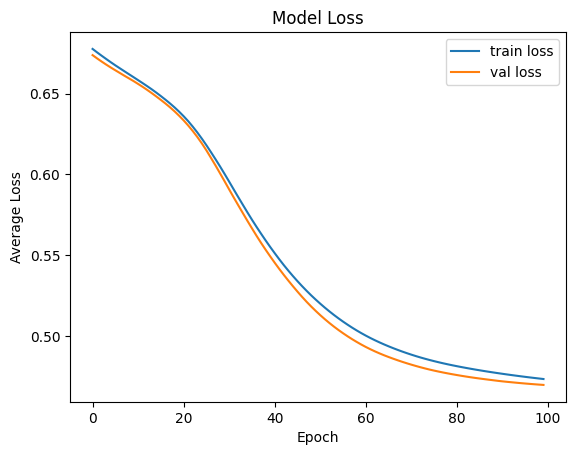

In [49]:

# print(train_epoch_losses)
plt.plot(range(n_epochs), train_epoch_loss, label="train loss")
plt.plot(range(n_epochs),val_loss,  label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [50]:

"""noisy data"""


times=3
X_deviation=0.02 #defining the deviation
X_new=X_train.clone()
y_new=y_train.clone()
for i in range(times):
  noise_X= torch.randn_like(X_train) * X_deviation  #creating a random data based on the X and Y with deviation
  noise_y=torch.randn_like(y_train)

  X_noisy=X_train+noise_X
  y_noisy=y_train+noise_y

  X_noisy[:, 0] = torch.where(X_noisy[:, 0] < 0,torch.tensor(0),noise_X[:, 0].round()) # changing the pregnancies into 0 or integer

  binary_noise_y = torch.where(y_noisy>= 0.5, torch.tensor(1), torch.tensor(0)) #changing the output into one or 0

#appending
  X_new = torch.cat((X_new, X_noisy.squeeze(0)), dim=0) #concatinating the noisy and data
  y_new =torch.cat((y_new,binary_noise_y.squeeze(0)), dim =0)



print(headings.head(0))
# print(X_noisy[:50])
# print(X_new[:10])
# print(binary_noise_y.size())

# print(X_new.size())

print(X_new.shape)
print(y_new.shape)
# print(X_new)
# print(y_new)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
torch.Size([2304, 8])
torch.Size([2304, 1])


In [51]:


#randomizing  the training data
X_new_indexes = torch.randperm(X_new.shape[0])
X_new_data = X_new[X_new_indexes]

# y_new_indexes = torch.randperm(y_new.shape[0])
y_new_data = y_new[X_new_indexes]



# defining  training,validation and testing
train_Xnew,val_Xnew, train_ynew, val_ynew=train_test_split(X_new_data,y_new_data, test_size=0.2)



# print(f"old size= {X.size()}, new size = {X_new.size()}")
# print(y_new.size())
# y_new=y_new.reshape(-1, 1)


# print(X_new_data)
# print(y_new_data)

In [52]:
#new model
torch.manual_seed(41)
# 1 : 250 :50: 0001
# 14 : 150 : 55 : 0.0001
new_model= PimaClassifier()
print(new_model)


PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=14, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=14, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [53]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(new_model.parameters(), lr= 0.0001)

In [54]:

BATCH_SIZE = 20
N_EPOCHS = 250
new_train_losses = []
new_val_losses = []
for epoch in range(N_EPOCHS):
    t_loss = 0
    for i in range(0, len(train_Xnew), BATCH_SIZE):
        X_batch = train_Xnew[i:i+BATCH_SIZE]
        y_batch = train_ynew[i:i+BATCH_SIZE]
        y_pred_new = new_model(X_batch)
        loss_new = loss_fn(y_pred_new, y_batch)
        t_loss += loss_new.item()
        optimizer.zero_grad()
        loss_new.backward()
        optimizer.step()
    t_loss /= len(X_new_data) / BATCH_SIZE
    new_train_losses.append(t_loss)
    new_model.eval()
    with torch.no_grad():
        y_pred_val_new = new_model(X_val)
        loss_val_new = loss_fn(y_pred_val_new, y_val)
        new_val_losses.append(loss_val_new.item())
    if epoch % 10 == 0:
      print(f"train loss : {t_loss}, validation loss : {loss_val_new.item()}")


train loss : 0.5485837735856572, validation loss : 0.6523736119270325
train loss : 0.5417897034850385, validation loss : 0.6406956315040588
train loss : 0.533325843926933, validation loss : 0.6214805841445923
train loss : 0.5236687327528166, validation loss : 0.5965343713760376
train loss : 0.5170439067296684, validation loss : 0.5752658247947693
train loss : 0.5130551626077956, validation loss : 0.5604329705238342
train loss : 0.5102764450324079, validation loss : 0.5499421954154968
train loss : 0.5082009241191877, validation loss : 0.5424873232841492
train loss : 0.5065780821152859, validation loss : 0.5368976593017578
train loss : 0.5053682578727603, validation loss : 0.532561182975769
train loss : 0.5044523843874534, validation loss : 0.5289310216903687
train loss : 0.5036893859505653, validation loss : 0.5259082913398743
train loss : 0.5030134452196459, validation loss : 0.5233458280563354
train loss : 0.5023508914746344, validation loss : 0.5210616588592529
train loss : 0.5017404

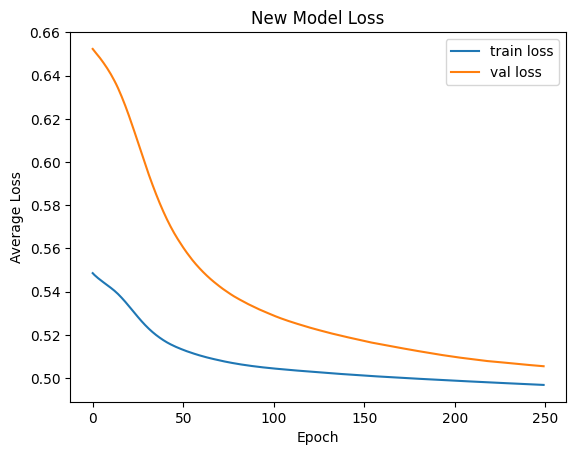

In [55]:
# Plot new training and validation losses
plt.plot(range(len(new_train_losses)), new_train_losses, label="train loss")
plt.plot(range(len(new_train_losses)), new_val_losses, label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('New Model Loss')
plt.legend()
plt.show()

In [56]:
with torch.no_grad():
    new_model.eval()
    total = 0
    y_pred_noise = new_model(X_test)
    Test_accuracy1 = (y_pred_noise.round() == y_test).float().sum()
    total = float(y_test.size(0))
    print("Testing Accuracy :",((Test_accuracy1 / total) * 100 ).item())
    print(f"got {Test_accuracy1} correct from {len(X_test)}")

Testing Accuracy : 77.92207336425781
got 120.0 correct from 154


SyntaxError: invalid syntax (<ipython-input-57-a5d5b61aa8a6>, line 1)